# Markers en lijnen
## Markers
We kunnen verschillende soorten [markers](https://matplotlib.org/stable/api/markers_api.html) gebruiken in een plot voor de datapunten.

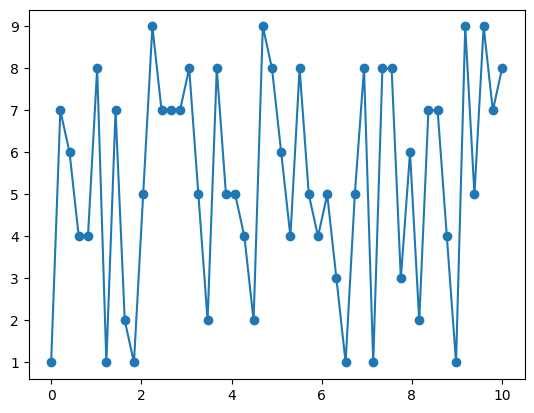

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(42)
x = np.linspace(0, 10)
y = rng.integers(1, 10, len(x))
plt.plot(x, y, marker='o')
plt.show()

## Lijnen
Iets gelijkaardigs geldt ook voor de [linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

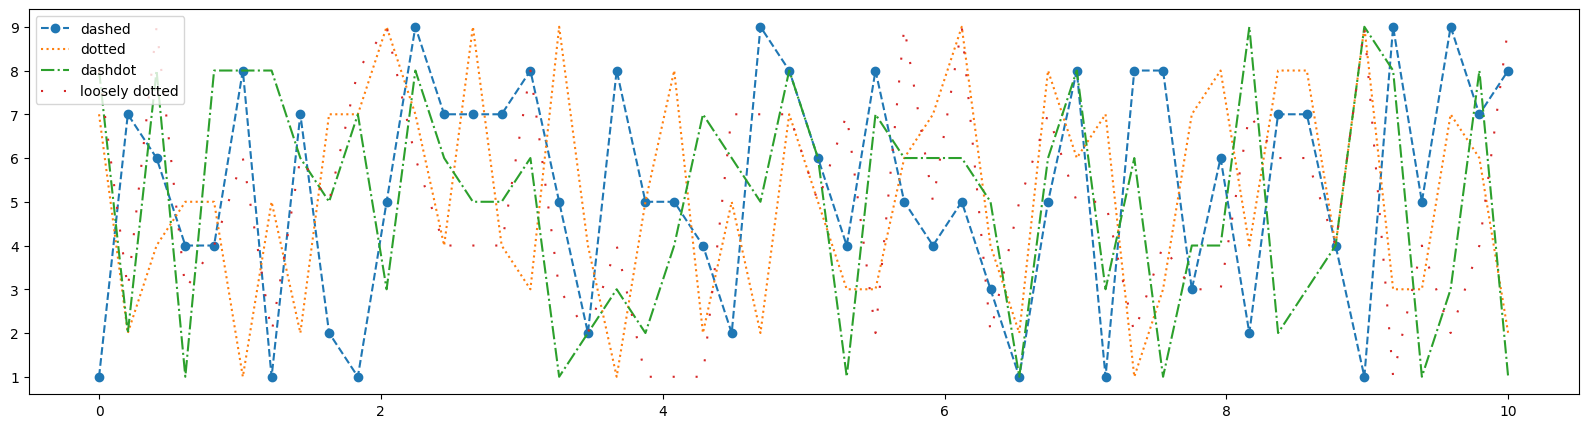

In [5]:
rng = np.random.default_rng(42)
x = np.linspace(0, 10)
y = rng.integers(1, 10, size=(4,len(x)))
plt.figure(figsize=(20, 5))
plt.plot(x, y[0], marker='o', linestyle='--', label='dashed') #hetzelfde als 'dashed'
plt.plot(x, y[1], linestyle=':', label='dotted')              #hetzelfde als 'dotted'"01 Different types of visualizations.pptx"
plt.plot(x, y[2], linestyle='-.', label='dashdot')             #hetzelfde als 'dashdot'
plt.plot(x, y[3], linestyle=(0, (1, 10)), label = 'loosely dotted')
plt.legend()
plt.show()

## Scores op examen

In [ ]:
from pathlib import Path
from zipfile import ZipFile
import requests
URL = "https://www.kaggle.com/api/v1/datasets/download/spscientist/students-performance-in-exams"
STUDENTS_EXAM_ZIP = "students_performance_in_exams.zip"
students_exam_path = Path(STUDENTS_EXAM_ZIP)
if not students_exam_path.exists():
    data = requests.get(URL)
    with open(STUDENTS_EXAM_ZIP, "wb") as f:
        f.write(data.content)
    with open(STUDENTS_EXAM_ZIP, "rb") as f:
        ZipFile(f).extractall()

## Kleinste kwadratenanalyse

0.7872292395756454 17.141806785685183
[[ 3.08019672e-04 -2.03567120e-02]
 [-2.03567120e-02  1.41610349e+00]]


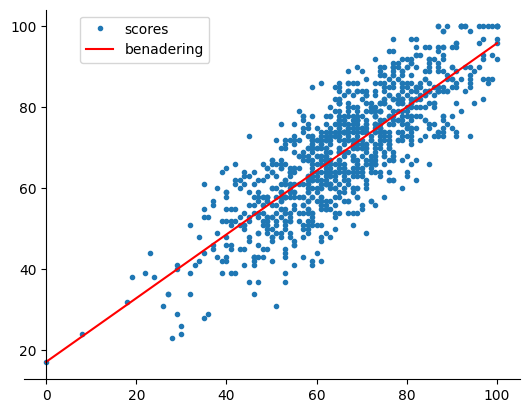

In [3]:
import pandas as pd
from scipy import optimize

# We veronderstellen een lineair verband
def lijn(x, a, b):
    y = a * x + b
    return y
STUDENTS_CSV = "StudentsPerformance.csv"
df = pd.read_csv(STUDENTS_CSV, usecols=['math score', 'reading score', 'writing score', 'gender'], dtype={'gender':'category'})
x = df["math score"].to_numpy()
y = df["reading score"].to_numpy()
(a, b), cov = optimize.curve_fit(lijn, xdata=x, ydata=y)
print(a, b)
print(cov)
plt.plot(df["math score"], df["reading score"], linestyle="", marker=".", label="scores")
x1, x2 = 0, 100
y1 = lijn(x1, a, b)
y2 = lijn(x2, a, b)
plt.plot((x1, x2), (y1, y2), c='r', label="benadering")
plt.gca().spines['left'].set_position('zero')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1))
plt.show()

## Roteren van data en 'lijnen op zicht'
Met *hlines* kunnen we 1 of meer horizontale lijnen trekken. En met *vlines* natuurlijk verticale.

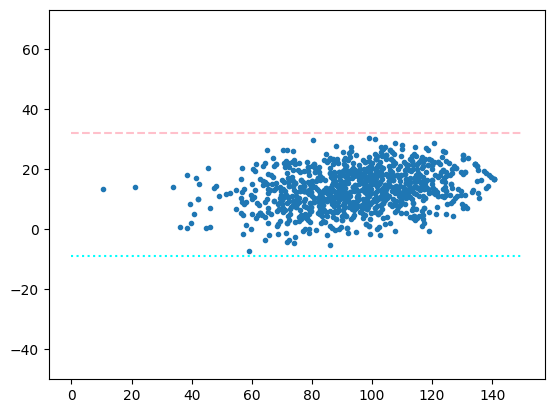

In [ ]:
import numpy as np
hoek = np.arctan(a)
rotatie_matrix = np.array([[np.cos(hoek), np.sin(hoek)], [-np.sin(hoek), np.cos(hoek)]])
oude_coordinaten = df.loc[:, ["math score", "reading score"]].to_numpy().T
nieuwe_coordinaten = rotatie_matrix @ oude_coordinaten

plt.plot(nieuwe_coordinaten[0], nieuwe_coordinaten[1], linestyle="", marker=".")
plt.hlines([-9, 32], [0, 0], [150, 150], linestyles=['dotted', 'dashed'], colors=['cyan', 'pink'])
plt.axis('equal')
plt.show()

## Errorplots
Met een errorplot kunnen we tonen hoe groot de fout op een meting is.

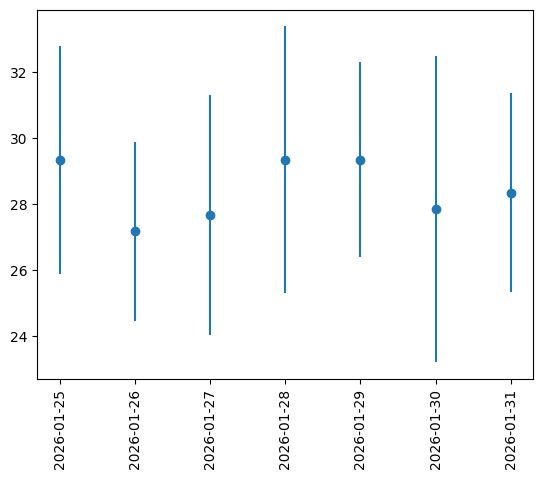

In [4]:
datums = pd.date_range(pd.to_datetime('2026-01-25'), pd.to_datetime('2026-01-31'))
rng = np.random.default_rng(42)
fouten = rng.integers(0, 5, size=(6, len(datums))) - 4
temperaturen = rng.integers(25, 36, size=(6, len(datums)))
temperaturen = temperaturen + fouten
gemiddelde_temp = temperaturen.mean(axis=0)
std_temp = temperaturen.std(axis=0,ddof=1)
plt.errorbar(datums, gemiddelde_temp, yerr=std_temp, linestyle='', marker='o')
plt.gca().tick_params("x", rotation=90)
plt.show()

## Extra opties bij errorplots

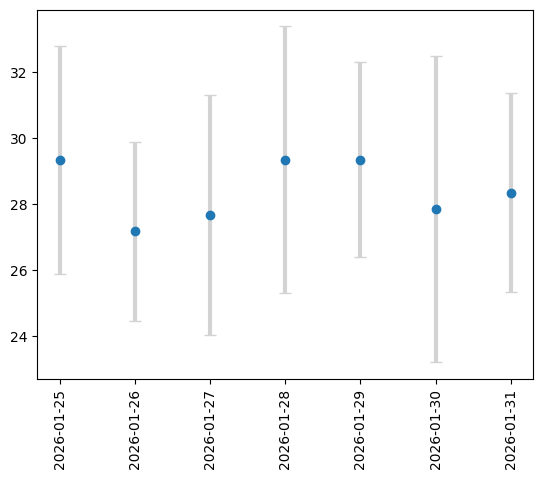

In [6]:
plt.errorbar(datums, gemiddelde_temp, yerr=std_temp, linestyle='', 
             marker='o', ecolor='lightgray', elinewidth=3, capsize=4)
plt.gca().tick_params("x", rotation=90)
plt.show()

## Onzekerheden voor continue data

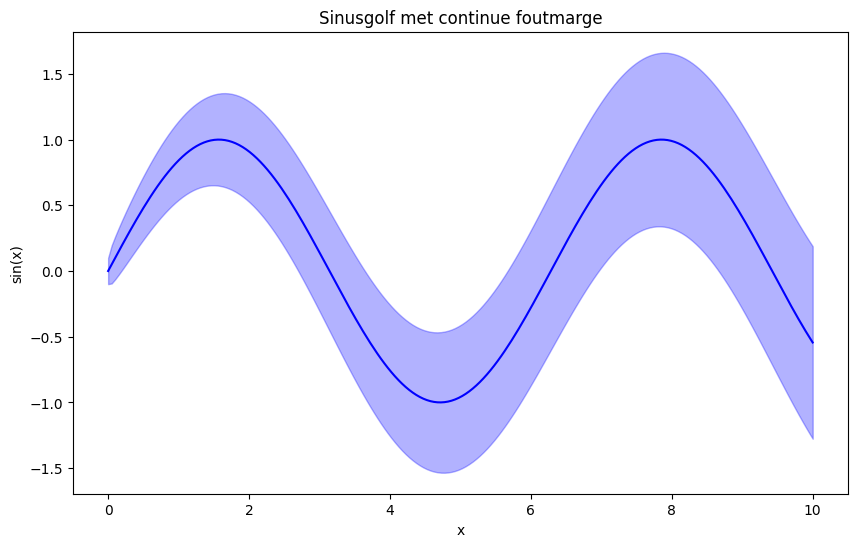

In [9]:
x = np.linspace(0, 10, 200)
y = np.sin(x)
error = 0.1 + 0.2 * np.sqrt(x)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='Sinus functie', color='blue')
ax.fill_between(x, y - error, y + error, color='blue', alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('Sinusgolf met continue foutmarge')
plt.show()

## Een heatmap
Met een heatmap kunnen we de correlaties tussen parameters tonen.

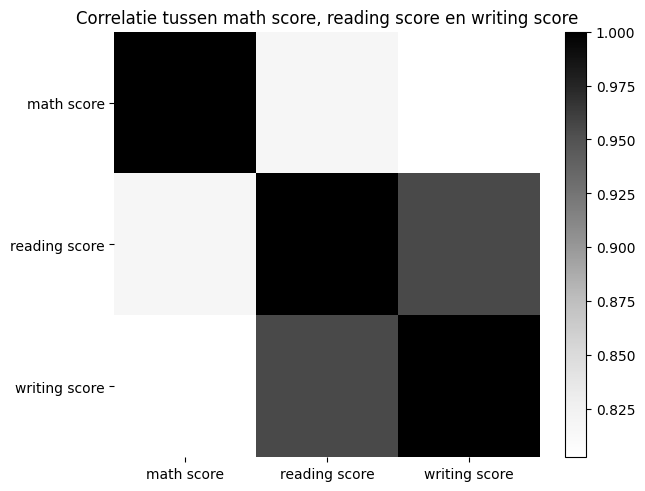

In [50]:

corr_coef = np.corrcoef(df[['math score','reading score', 'writing score']].T)
fig, ax = plt.subplots(layout='constrained')
im = ax.imshow(corr_coef, cmap='Greys')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(range(len(df.columns[1:])), labels=df.columns[1:])
ax.set_yticks(range(len(df.columns[1:])), labels=df.columns[1:])
ax.spines[:].set_visible(False)
ax.set_title('Correlatie tussen math score, reading score en writing score')

plt.show()



## Een boxplot
Een boxplot laat de verdeling van waarden zien op basis van kwartielen. We zullen beginnen met de gegevens van de Titanic te downloaden.

In [1]:
from pathlib import Path 

from zipfile import ZipFile
import requests
URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()

## De kwartielen
We werken met de leeftijd .We kunnen de kwartielen zien met .describe()

In [3]:
import pandas as pd
TITANIC_CSV = 'Titanic-Dataset.csv'
df = pd.read_csv(TITANIC_CSV)
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Een boxplot
Een boxplot toont de mediaan als een oranje lijn. De 'box' wordt gevormd door het eerste en derde kwartiel. Het verschil tussen eerste en derde kwartiel noemen we ook de 'inter-quartile range' (IQR). De 'whiskers' staan op 1.5 IQR boven en onder de plot. Maar ze strekken zich nooit verder uit dan de data. Kijk naar de onder-whisker.Die zou normaal kleiner moeten zijn dan 0, maar er zijn geen leeftijden kleiner dan 0

De punten die buiten de whiskers vallen, worden apart geplot. 

IQR overleefd: 17.0
IQR niet overleefd: 18.0


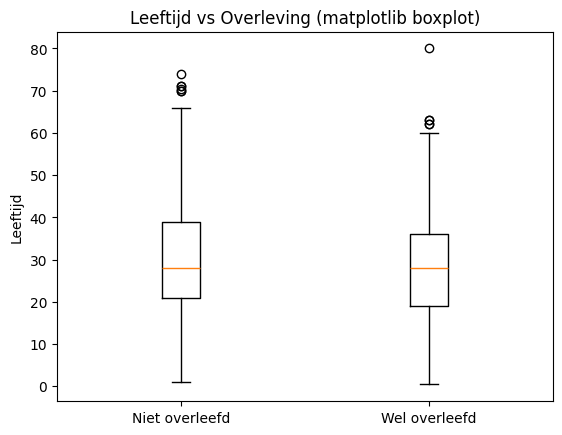

In [9]:
import matplotlib.pyplot as plt

overleefd = df.loc[df.Survived == 1, 'Age'].dropna()

print('IQR overleefd:', overleefd.quantile(0.75) - overleefd.quantile(0.25) )
niet_overleefd = df.loc[df.Survived == 0, 'Age'].dropna()
print('IQR niet overleefd:', niet_overleefd.quantile(0.75) - niet_overleefd.quantile(0.25) )
plt.boxplot([niet_overleefd, overleefd], tick_labels=["Niet overleefd", "Wel overleefd"])
plt.ylabel("Leeftijd")
plt.title("Leeftijd vs Overleving (matplotlib boxplot)")
plt.show()

## Seaborn
Een alternatief voor matplotlib is seaborn. Met sns.set_theme() veranderen we de default parameters voor matplotlib en seaborn plots.

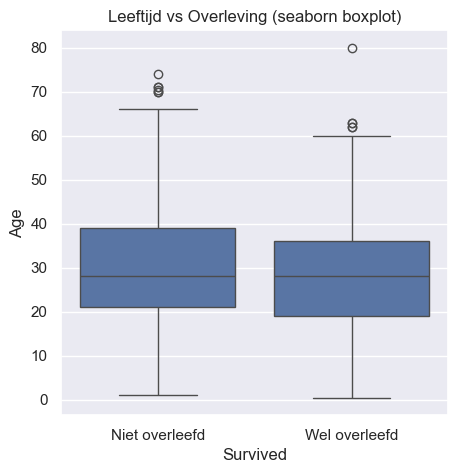

In [11]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x="Survived", y="Age")
plt.xticks([0,1], ["Niet overleefd", "Wel overleefd"])
plt.title("Leeftijd vs Overleving (seaborn boxplot)")
plt.show()


## De violin plot
Een violin plot combineert een kernel density plot met de informatie van een boxplot: des te breder des te meer data

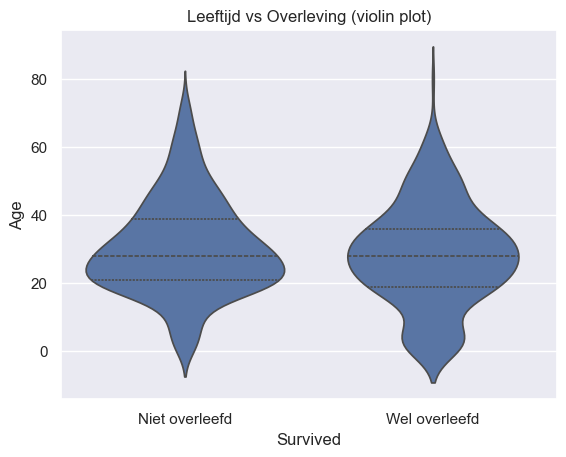

In [12]:
plt.figure()
sns.violinplot(data=df, x="Survived", y="Age", inner="quartile")
plt.xticks([0,1], ["Niet overleefd", "Wel overleefd"])
plt.title("Leeftijd vs Overleving (violin plot)")
plt.show()

## Leeftijd per klasse en geslacht combineren
We kunnen informatie over klasse en geslacht ook toevoegen.

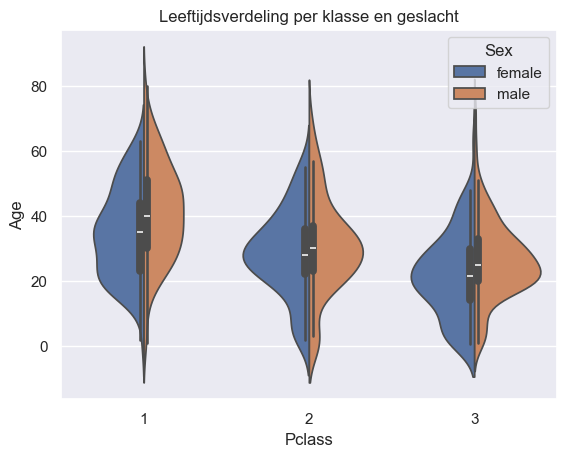

In [13]:
plt.figure()
sns.violinplot(data=df, x="Pclass", y="Age", hue="Sex", split=True)
plt.title("Leeftijdsverdeling per klasse en geslacht")
plt.show()